In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_smoke=pd.read_csv('/workspaces/codespaces-blank/Proyecto_DS/datasets/raw/smoke_detection_iot.csv')
df_smoke.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


# Dataset detector de humo

## Descripción de variables

- UTC: Tiempo Universal coordinado (tiempo en el que se llevó a cabo el experimento). 
- Temperature[C]: Temperatura de los alrededores, en Celsius.
- Humidity[%]: Humedad de ambiente.
- TVOC[ppb]: Compuestos organicos volatiles totales, en ppb. 
- eCO2[ppm]: Concentración de CO2, en ppm.
- Raw H2: Hidrógeno crudo en alrededores.
- Raw Ethanol: Etanol crudo en el ambiente.
- Pressure[hPa]: Presión atmosférica, en hPa.
- PM1.0: Paticulate matter of diameter less than 1.0 micrometer.
- PM2.5: Paticulate matter of diameter less than 2.5 micrometer.
- NC0.5: Concentración de particulas de diámetro menor a 0.5 micrómetros.
- NC1.0: Concentración de particulas de diámetro menor a 1.0 micrómetros.
- NC2.5: Concentración de particulas de diámetro menor a 2.5 micrómetros.
- CNT: Contador de prueba.
- Fire Alarm: 1 positivo,  0 no positivo. 


[Fuente](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6).


In [3]:
#Index y unnamed:0 no son columnas relevantes. Se eliminarán y se pondrá a la columna CNT como columna índce
df_smoke = df_smoke.drop('Unnamed: 0', axis='columns')

In [4]:
df_smoke.index = df_smoke['CNT']
df_smoke = df_smoke.drop('CNT', axis='columns')
df_smoke.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
CNT,,,,,,,,,,,,,,
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


## Hipótesis

1. La temperatura tendrá incidencia 

In [5]:
df_smoke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 5743
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(6)
memory usage: 7.2 MB


In [6]:
#cuenta la cantidad de veces que la alarma se disparó (como son 1 se pueden sumar)
on_alarm_sum = df_smoke.loc[df_smoke['Fire Alarm'] == 1, 'Fire Alarm'].sum()

#cuenta la cantidad de veces que la alarma no se disparó (al ser valores 0 se deben contar)
off_alarm_sum = df_smoke.loc[df_smoke['Fire Alarm'] == 0, 'Fire Alarm'].count()

In [7]:
print (on_alarm_sum)
print (off_alarm_sum)

44757
17873


In [8]:
#chequeo que la suma dé como resultado el numero total de experimentos
on_alarm_sum + off_alarm_sum

62630

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


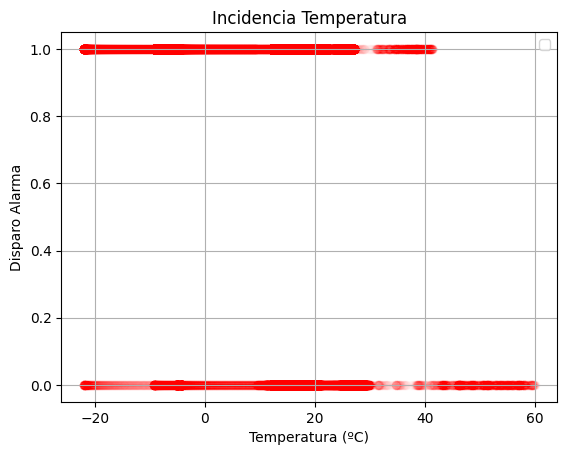

In [9]:
x = df_smoke['Temperature[C]']
y = df_smoke['Fire Alarm']

fig, ax = plt.subplots()
ax.scatter(x,y, alpha=0.01, color = 'red')
ax.set_title('Incidencia Temperatura')
ax.set_ylabel('Disparo Alarma')
ax.set_xlabel('Temperatura (ºC)')
ax.grid('True')
ax.legend()

#la idea sería en realidad hacer una separación entre veces que sonó la alarma y veces que no. Contar cada uno de esos eventos en cada rango de temperatura 
# y graficar eso, pero todavía no me doy idea de cómo hacerlo. Para cumplir con la actividad grafico esto.

Del gráfico de scattering podemos sacar conclusiones muy generales. Por ejemplo que arriba de 42 ºC no se disparó nunca la alarma. O que a bajas temperaturas la cantidad de veces que no se disparó la alarma es menor que la cantidad de veces que sí (al igual que sucede a temperaturas entre 30-40 ºC).

In [10]:
#convierto a enteros para no tener tantos valores solos, pierdo precisión pero no se me ocurre otra forma de resolverlo.
temperatura_2 = df_smoke['Temperature[C]'].astype(int)
#print(temperatura_2)

In [11]:
#cuenta la cantidad de veces que aparece cada valor de temperatura. 
# Para eso primero transformo temperatura_2 en una serie (por defecto no sabría que es eso si no es una serie)
count_temp = pd.Series(temperatura_2).value_counts()
print(count_temp)


26    7119
24    6329
20    4814
25    3115
19    2928
      ... 
49      47
58      46
42      43
44      35
30      28
Name: Temperature[C], Length: 82, dtype: int64


In [12]:
#cuento cuantas veces se prende y no se prende la alarma para un dado valor de Temperatura (en este caso 20). Uso la linea anterior para verificar de que esto 
#esta bien porque la suma de ambos debe dar lo mismo que antes.
on = df_smoke.loc[pd.Series(temperatura_2) == 20, 'Fire Alarm'].sum()
print(on)
off_2= df_smoke.loc[pd.Series(temperatura_2) == 20, 'Fire Alarm'].count()
print(off_2)
off=off_2-on
print(off)

3842
4814
972


In [13]:
#tengo que hacer lo mismo que antes pero para todos los valores de temperatura que tengo.
#tengo que pasarlo a lista (tolist) y el list y set son para que no me repita los mismos valores siempre.
temperatura_2 = df_smoke['Temperature[C]'].astype(int)
temperatura_3 = list(set(df_smoke['Temperature[C]'].astype(int).tolist()))
fire = df_smoke['Fire Alarm']

k = []
on = 0
off_2 = 0
off = 0

def countOccurrence(temperatures):

  for j in temperatures:
    on = df_smoke.loc[pd.Series(temperatura_2) == j, 'Fire Alarm'].sum()
    off_2= df_smoke.loc[pd.Series(temperatura_2) == j, 'Fire Alarm'].count()
    off=off_2-on
    k.append([j, off_2, on, off])

  return k
  
print(countOccurrence(temperatura_3))

df = pd.DataFrame(k, columns=['Temperatura', 'Numero experimentos', 'Alarma sonó', 'Alarma no sonó'])
print(df)
#on_2 = df_smoke.loc[pd.Series(temperatura_2), 'Fire Alarm'].sum()
#print(on_2)

#print(temperatura_3)

[[0, 721, 586, 135], [1, 343, 279, 64], [2, 332, 270, 62], [3, 328, 267, 61], [4, 323, 263, 60], [5, 321, 260, 61], [6, 317, 259, 58], [7, 320, 260, 60], [8, 319, 259, 60], [9, 321, 212, 109], [10, 359, 186, 173], [11, 653, 263, 390], [12, 2281, 1622, 659], [13, 1478, 840, 638], [14, 1269, 724, 545], [15, 1217, 684, 533], [16, 1244, 682, 562], [17, 1369, 711, 658], [18, 2672, 1898, 774], [19, 2928, 2296, 632], [20, 4814, 3842, 972], [21, 1570, 1250, 320], [22, 1393, 1143, 250], [23, 793, 505, 288], [24, 6329, 5894, 435], [25, 3115, 2083, 1032], [26, 7119, 5326, 1793], [27, 2396, 1488, 908], [28, 1252, 16, 1236], [29, 452, 4, 448], [30, 28, 7, 21], [31, 95, 57, 38], [32, 62, 47, 15], [33, 72, 65, 7], [34, 106, 80, 26], [35, 98, 75, 23], [36, 106, 97, 9], [37, 101, 97, 4], [38, 203, 156, 47], [39, 112, 81, 31], [40, 115, 99, 16], [41, 85, 46, 39], [42, 43, 0, 43], [43, 108, 0, 108], [44, 35, 0, 35], [45, 60, 0, 60], [46, 146, 0, 146], [47, 59, 0, 59], [48, 111, 0, 111], [49, 47, 0, 47], 

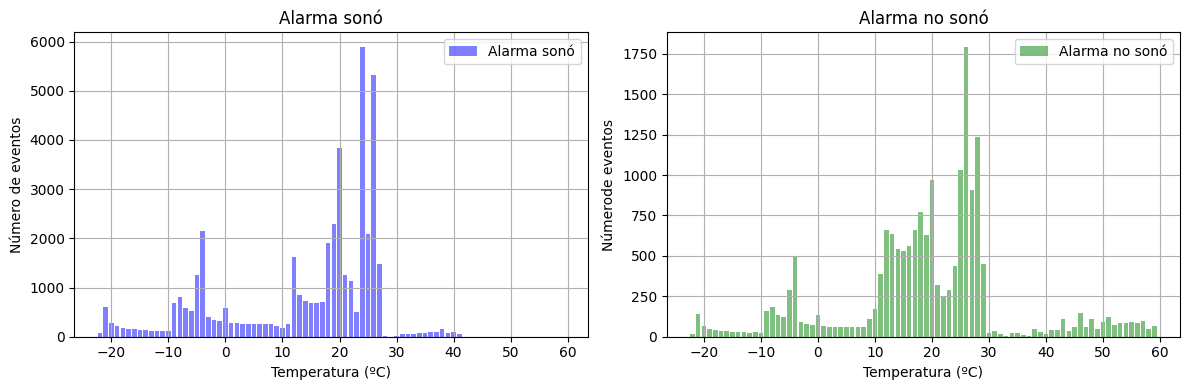

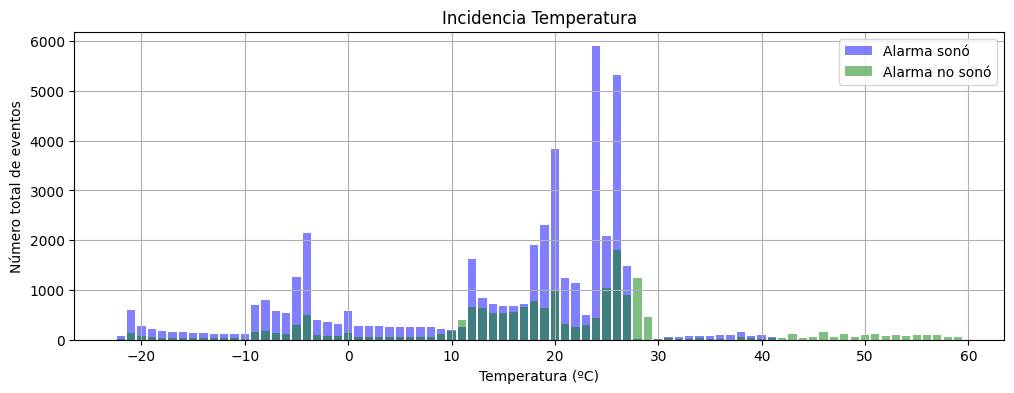

In [14]:
x = df['Temperatura']
y = df['Alarma sonó']
z = df['Alarma no sonó']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Primera gráfica
ax1.bar(x, y, alpha=0.5, color='blue', label='Alarma sonó')
ax1.set_title('Alarma sonó')
ax1.set_ylabel('Número de eventos')
ax1.set_xlabel('Temperatura (ºC)')
ax1.grid('True')
ax1.legend()

# Segunda gráfica
ax2.bar(x, z, alpha=0.5, color='green', label='Alarma no sonó')
ax2.set_title('Alarma no sonó')
ax2.set_ylabel('Númerode eventos')
ax2.set_xlabel('Temperatura (ºC)')
ax2.grid('True')
ax2.legend()

plt.tight_layout()

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x,y, alpha=0.5, color = 'blue',label='Alarma sonó')
ax.bar(x,z, alpha=0.5, color = 'green',label='Alarma no sonó')
ax.set_title('Incidencia Temperatura')
ax.set_ylabel('Número total de eventos')
ax.set_xlabel('Temperatura (ºC)')
ax.grid('True')
ax.legend()

Con estos gráficos más finos las conclusiones pueden ser más específicas. Vemos que entre -20-10 ºC las tendencias que siguen ambas gráficas son iguales, solo que la cantidad de veces que NO se disparó la alarma es menor, por lo tanto la altura de las barras son menores, pero la tendencia se comparte. La mayor densidad de eventos se encuentra entre 10-30 ºC. A altas temperaturas la alarma no se dispara. 

2. La humedad tendrá incidencia

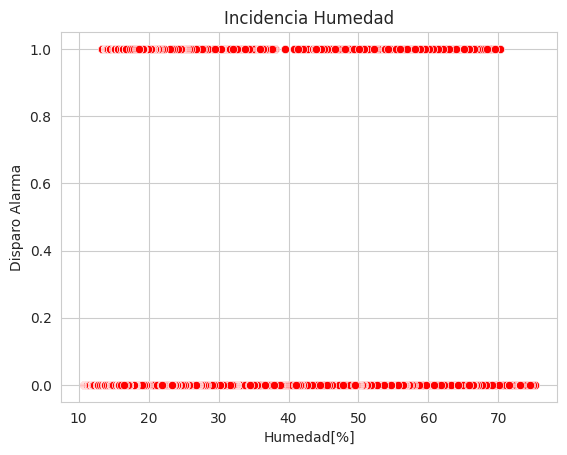

In [15]:
sns.set_style("whitegrid")
sns.scatterplot(x="Humidity[%]", y="Fire Alarm", data=df_smoke, color="red")
plt.xlabel("Humedad[%]")
plt.ylabel("Disparo Alarma")
plt.title("Incidencia Humedad")
plt.show()

Del gráfico de scattering podemos sacar conclusiones muy generales. Por ejemplo que arriba de 70 % no se disparó nunca la alarma.

In [16]:
humedad_2 = df_smoke['Humidity[%]'].astype(int)
humedad_3 = list(set(df_smoke['Humidity[%]'].astype(int).tolist()))
fire_2 = df_smoke['Fire Alarm']

k_hum = []
on_hum = 0
off_2hum = 0
off_hum = 0

def countOccurrence(humedades):

  for j in humedades:
    on_hum = df_smoke.loc[pd.Series(humedad_2) == j, 'Fire Alarm'].sum()
    off_2hum= df_smoke.loc[pd.Series(humedad_2) == j, 'Fire Alarm'].count()
    off_hum=off_2hum-on_hum
    k_hum.append([j, off_2hum, on_hum, off_hum])

  return k_hum
  
print(countOccurrence(humedad_3))

df_hum = pd.DataFrame(k_hum, columns=['Humedad', 'Numero experimentos', 'Alarma sonó', 'Alarma no sonó'])
print(df_hum)

[[10, 32, 0, 32], [11, 274, 0, 274], [12, 306, 0, 306], [13, 351, 113, 238], [14, 325, 137, 188], [15, 392, 250, 142], [16, 287, 143, 144], [17, 160, 86, 74], [18, 238, 58, 180], [19, 188, 22, 166], [20, 151, 17, 134], [21, 75, 5, 70], [22, 155, 1, 154], [23, 139, 3, 136], [24, 134, 6, 128], [25, 63, 5, 58], [26, 101, 7, 94], [27, 132, 4, 128], [28, 80, 6, 74], [29, 81, 3, 78], [30, 73, 14, 59], [31, 64, 18, 46], [32, 85, 14, 71], [33, 44, 16, 28], [34, 34, 9, 25], [35, 46, 28, 18], [36, 34, 17, 17], [37, 66, 19, 47], [38, 251, 3, 248], [39, 401, 2, 399], [40, 712, 2, 710], [41, 994, 5, 989], [42, 1047, 4, 1043], [43, 642, 10, 632], [44, 779, 4, 775], [45, 858, 3, 855], [46, 1820, 700, 1120], [47, 8449, 7116, 1333], [48, 5956, 4944, 1012], [49, 4532, 3627, 905], [50, 4432, 3600, 832], [51, 4128, 3430, 698], [52, 5782, 5169, 613], [53, 8326, 7670, 656], [54, 3014, 2511, 503], [55, 2113, 1610, 503], [56, 1824, 1302, 522], [57, 858, 684, 174], [58, 302, 292, 10], [59, 232, 218, 14], [60, 

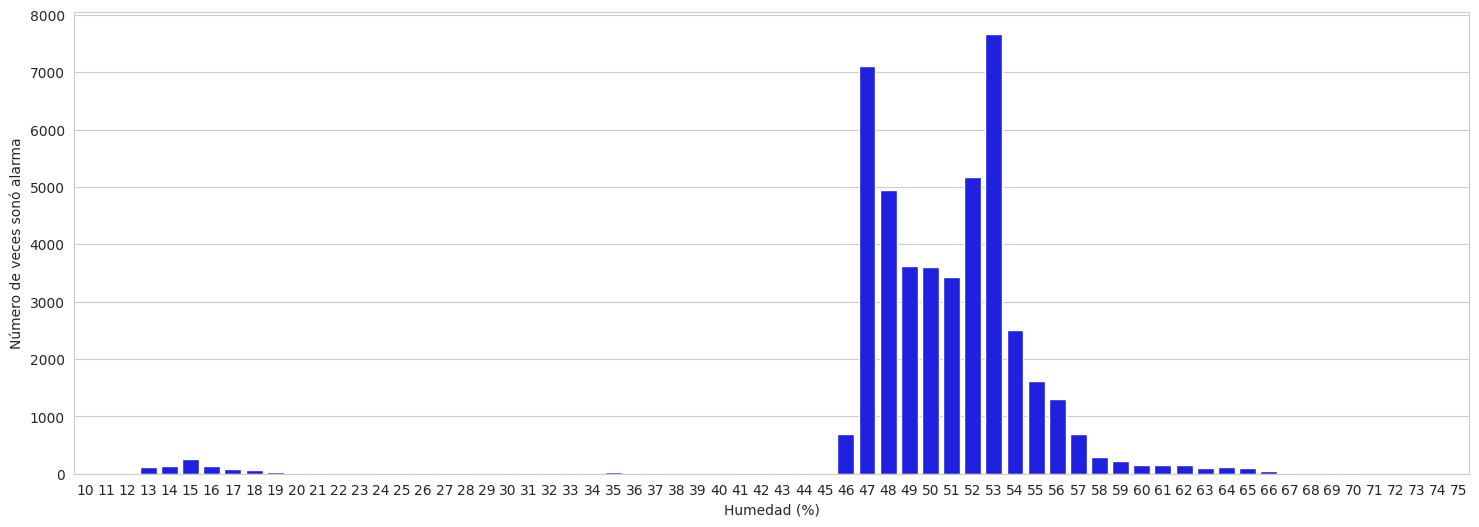

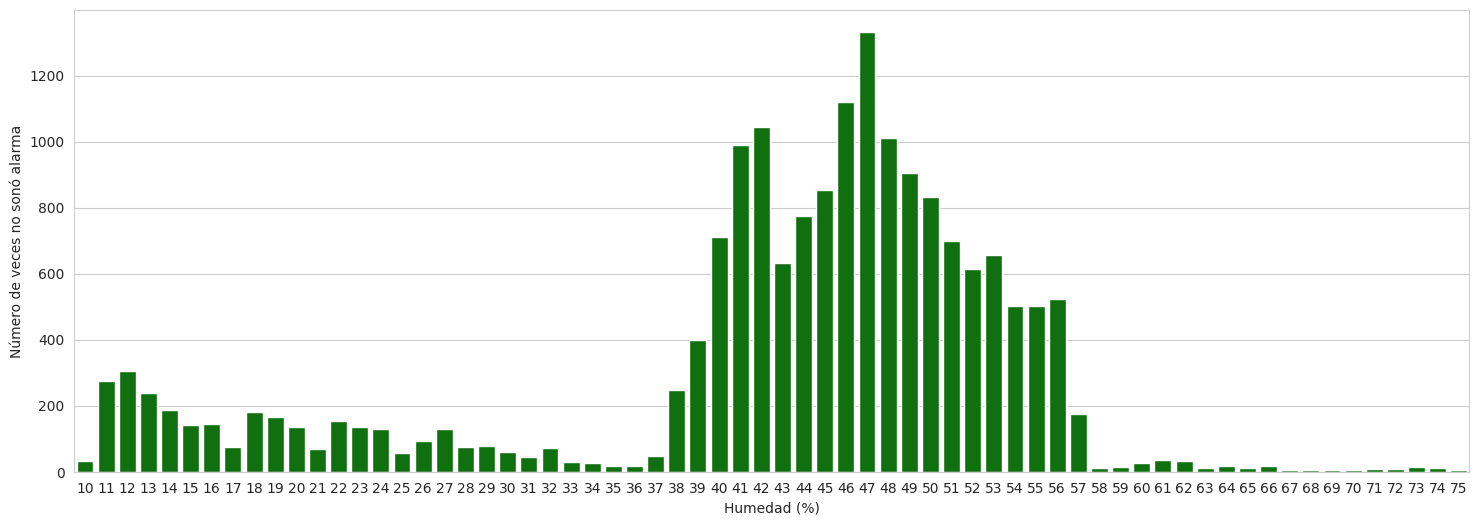

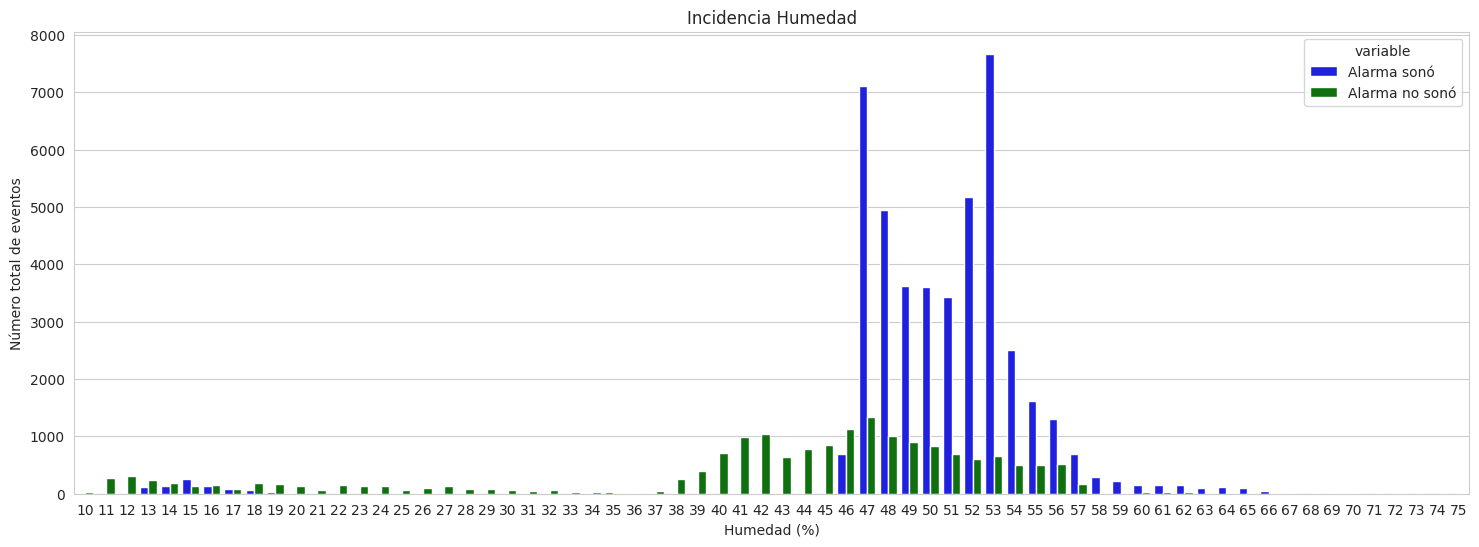

In [17]:
plt.figure(figsize=(18,6))
sns.barplot(x="Humedad", y="Alarma sonó", data=df_hum, color="blue")
plt.xlabel("Humedad (%)")
plt.ylabel("Número de veces sonó alarma")
plt.show()

plt.figure(figsize=(18,6))
sns.barplot(x="Humedad", y="Alarma no sonó", data=df_hum, color="green")
plt.xlabel("Humedad (%)")
plt.ylabel("Número de veces no sonó alarma")
plt.show()


plt.figure(figsize=(18,6))
df_hum_melted = pd.melt(df_hum, id_vars='Humedad', value_vars=['Alarma sonó', 'Alarma no sonó'])

sns.barplot(x="Humedad", y="value", hue="variable", data=df_hum_melted, palette=["blue", "green"])
plt.xlabel("Humedad (%)")
plt.ylabel("Número total de eventos")
plt.title('Incidencia Humedad')
plt.show()


La alarma suena con muy poca frecuencia por debajo de los 46%, teniendo algunos eventos aislados entre 13 y 17%. Arriba de 58% la alarma sonó tla mayoría de las veces que se realizó el experimento (pero no en su totalidad). 